In [1]:
import torch
import glob
from skimage.measure import marching_cubes_lewiner, marching_cubes
import nibabel
import os
import trimesh
import numpy as np
from natsort import natsorted
import plotly.graph_objects as go
import pymeshlab
sorted = natsorted
from numba import njit
import cc3d
import re
from scipy.ndimage import gaussian_filter
from collections import defaultdict
from matplotlib import pyplot as plt
from tqdm import tqdm

In [3]:
# root_brain = '../fcd_newdataset/brain_folder/'
# root_mask = '../fcd_newdataset/mask_folder/'

# brain_mask = defaultdict(dict)
# for p in tqdm(os.listdir(root_mask)):
#     name = p.split('_fcd_')[-1].split('.nii.gz')[0]
    
#     brain_path = list(filter(lambda x: '_' + name in x and 'nofcd' not in x, os.listdir(root_brain)))[0]
#     mask_path = os.path.join(root_mask, p)
    
#     brain_path = os.path.join(root_brain, brain_path)
    
#     brain_mask[name]['brain'] = nibabel.load(brain_path)#.get_fdata()
#     brain_mask[name]['mask'] = nibabel.load(mask_path)#.get_fdata()    

In [2]:
# for name,v in tqdm(brain_mask.items()):
#     brain_tensor_torch = torch.tensor(v['brain'].get_fdata(), dtype=torch.float)
#     mask_tensor_torch = torch.tensor(v['mask'].get_fdata(), dtype=torch.float)
#     torch_tensor = torch.stack([brain_tensor_torch, mask_tensor_torch])
#     torch.save(torch_tensor, f'../fcd_newdataset_tensors/{name}')

# Visualize brain

In [42]:
brain_tensor_torch, mask_tensor_torch = torch.load('../fcd_newdataset_tensors/0.1')

In [43]:
brain_tensor = brain_tensor_torch.numpy()
mask_tensor = mask_tensor_torch.numpy()

In [45]:
Z_pos = np.argmax(mask_tensor.sum((0,1)))
Y_pos = np.argmax(mask_tensor.sum((0,2)))
X_pos = np.argmax(mask_tensor.sum((2,1)))

In [47]:
# X_max, Y_max, Z_max = brain_tensor.shape

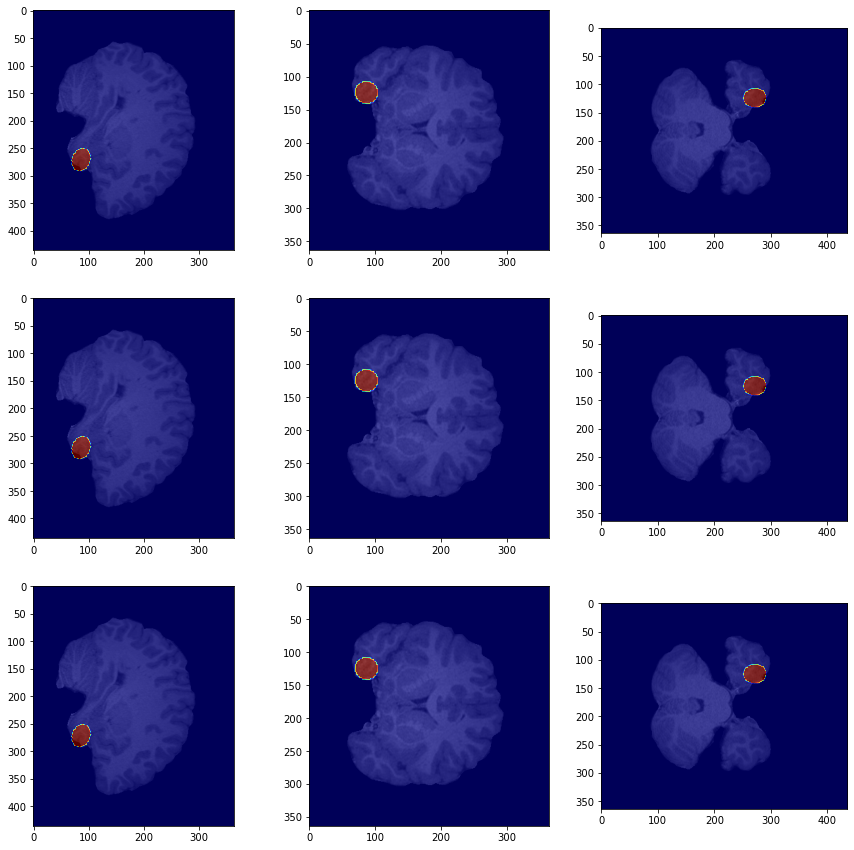

In [48]:
fig, axes = plt.subplots(ncols=3, nrows=n_slices_show, figsize=(15,n_slices_show*5))

for i in range(n_slices_show):

    x_slice_pos = X_pos #(X_max//n_slices_show)*i
    y_slice_pos = Y_pos #(Y_max//n_slices_show)*i
    z_slice_pos = Z_pos #(Z_max//n_slices_show)*i

    brain_tensor_x_slice = brain_tensor[x_slice_pos,:,:]
    brain_tensor_y_slice = brain_tensor[:,y_slice_pos,:]
    brain_tensor_z_slice = brain_tensor[:,:,z_slice_pos]
    
    mask_tensor_x_slice = mask_tensor[x_slice_pos,:,:]
    mask_tensor_y_slice = mask_tensor[:,y_slice_pos,:]
    mask_tensor_z_slice = mask_tensor[:,:,z_slice_pos]

    axes[i,0].imshow(brain_tensor_x_slice, 'gray')
    axes[i,0].imshow(mask_tensor_x_slice, 'jet', interpolation='none', alpha=0.7)
    
    axes[i,1].imshow(brain_tensor_y_slice, 'gray')
    axes[i,1].imshow(mask_tensor_y_slice, 'jet', interpolation='none', alpha=0.7)
    
    axes[i,2].imshow(brain_tensor_z_slice, 'gray')
    axes[i,2].imshow(mask_tensor_z_slice, 'jet', interpolation='none', alpha=0.7)
    
plt.show()